In [3]:
import torch
import os
os.chdir('/home/yuanyuan/scripts/test_Chrombus_pyG/')

from Chrombus_pyG.model_utils_pyG import get_models,train_model
from Chrombus_pyG.model_utils_pyG import load_chrombus_data,load_chrombus_data_singlechrom

### 1. Model training

In [2]:
datapath = './data/'
train_chr = 17
test_chr = 18
outpath = './example/'
modelpath = './example/'

In [3]:
train_loader = load_chrombus_data_singlechrom(datapath,train_chr,outpath)
test_loader = load_chrombus_data_singlechrom(datapath,test_chr,outpath)

In [12]:
model = get_models()
train_model(model=model, trainloader=train_loader, testloader=test_loader,filepath=modelpath,epochs=10)

Epoch: 0, Train Loss:1.109, Train Cor:0.031, Test Loss:0.594, Test Cor:0.025478
Epoch: 1, Train Loss:1.096, Train Cor:0.060, Test Loss:0.548, Test Cor:0.053674
Epoch: 2, Train Loss:1.065, Train Cor:0.069, Test Loss:0.568, Test Cor:0.060803
Epoch: 3, Train Loss:1.059, Train Cor:0.082, Test Loss:0.566, Test Cor:0.055934
Epoch: 4, Train Loss:1.052, Train Cor:0.085, Test Loss:0.565, Test Cor:0.060554
Epoch: 5, Train Loss:1.042, Train Cor:0.086, Test Loss:0.586, Test Cor:0.067867
Epoch: 6, Train Loss:1.044, Train Cor:0.091, Test Loss:0.570, Test Cor:0.064820
Epoch: 7, Train Loss:1.041, Train Cor:0.105, Test Loss:0.566, Test Cor:0.077778
Epoch: 8, Train Loss:1.040, Train Cor:0.108, Test Loss:0.561, Test Cor:0.083484
Epoch: 9, Train Loss:1.033, Train Cor:0.128, Test Loss:0.560, Test Cor:0.093638


### 2. Predicting

In [4]:
from Chrombus_pyG.model_utils_pyG import get_pred,get_region_pred

In [5]:
#modelpath = './example/model_epoch9.chrombus.pkl'
modelpath = './example/model_epoch299.pkl'
chrom = 18
datapath = './data/'
outpath = './example/'

#### 2.1 Predicting specific region.

In [6]:
model = get_models()
model.load_state_dict(torch.load(modelpath))

<All keys matched successfully>

In [7]:
start = 25800000
end = 28300000
result = get_region_pred(modelpath,chrom=chrom, start = start, end = end,datapath=datapath,outpath=outpath)


In [8]:
result

,from,to,pred,v_chr,v_start1,v_end1,v_start2,v_end2,dist,chrom,hic
0,212,212,3.973938,18,0.277863,0.278437,0.277863,0.278437,-46091.0,18,6.910457
1,212,213,4.301487,18,0.277863,0.278437,0.278437,0.280731,0.0,18,4.555352
2,212,214,4.182029,18,0.277863,0.278437,0.280731,0.282488,184424.0,18,3.661720
3,212,215,3.516449,18,0.277863,0.278437,0.282488,0.283667,325638.0,18,3.239311
4,212,216,3.903546,18,0.277863,0.278437,0.283667,0.283848,420335.0,18,2.511518
...,...,...,...,...,...,...,...,...,...,...,...
8251,337,338,2.533705,18,0.419938,0.421031,0.421031,0.423424,0.0,18,4.073978
8252,337,339,3.060505,18,0.419938,0.421031,0.423424,0.424555,192355.0,18,3.644318
8253,338,338,2.867384,18,0.421031,0.423424,0.421031,0.423424,-192355.0,18,5.739724
8254,338,339,3.355013,18,0.421031,0.423424,0.423424,0.424555,0.0,18,4.371077


In [9]:
result[['pred','hic']].corr()

,pred,hic
pred,1.000000,0.659058
hic,0.659058,1.000000


(-0.7571438569575548, 17.578700060024858, -0.8922204069126833, 8.8938357076631)

<Figure size 800x640 with 0 Axes>

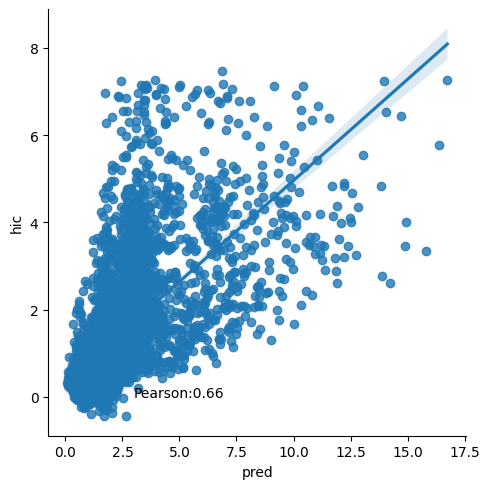

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 8), dpi=80)
fig1 = sns.lmplot(x = 'pred', y = 'hic', data = result)
plt.text(3,0,"Pearson:{:.2f}".format(result[['pred','hic']].corr().iloc[1,0]))
plt.axis('on')

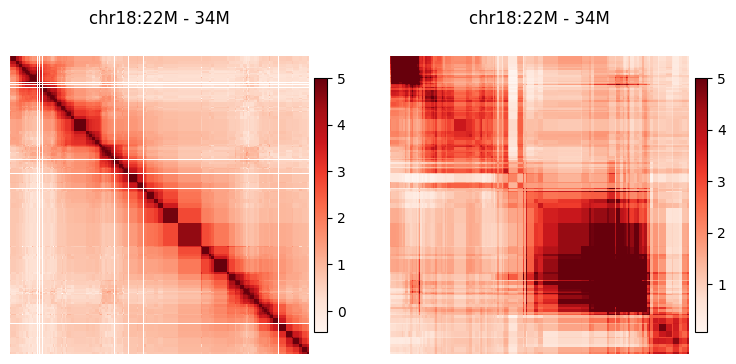

In [11]:
from Chrombus_pyG.model_utils_pyG import hic_heatmap
hic_heatmap(result, chrom, outpath)

#### 2.3 Predicting the chromatin interaction of chromosome 18.

with a 128-segment window, and the step is 9. The results can be found at the "outpath".

In [5]:
get_pred(model_path=modelpath,chrom=chrom,datapath=datapath,outpath=outpath)